In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
os.listdir("plaid_csvs")

['uniref_wandb_export.csv',
 'neurips2024_pfam_compression - organize.csv',
 'cath_fsq_results.csv',
 'uniref50_tanh_result.csv',
 '20240508_pfam_wandb_export.csv',
 'cath_compression_results.csv',
 'plaid_hourglass_vq.csv',
 'cath_vqvae_result.csv',
 'cath_notanh.csv',
 'plaid_hourglass_2.csv',
 '.ipynb_checkpoints',
 'cath_notanh_proj.csv']

In [2]:
cath_shortened = pd.read_csv("plaid_csvs/cath_notanh.csv", sep=",")
print(cath_shortened.shape)
cath_shortened.head()

(9, 150)


,Name,ID,Runtime,cfg.hourglass.downproj_factor,cfg.hourglass.shorten_factor,Created,State,Notes,User,Tags,...,train/seq_acc_epoch,train/seq_acc_step,train/seq_loss_epoch,train/seq_loss_step,trainer/global_step,val/loss,val/recons_loss,val/seq_acc,val/seq_loss,hi
0,cath_tanh_256_4,8ebs7j9h,92366,256,2,2024-05-15T00:41:55.000Z,finished,-,lu-amy-al1,NaN,...,0.522836,0.562304,3.502690,3.519761e+00,171119,0.025043,0.025043,0.529034,3.533406,NaN
1,cath_tanh_256_8,mm9fe6x9,11459,128,2,2024-05-16T20:44:38.000Z,crashed,-,lu-amy-al1,NaN,...,0.968697,0.967503,0.319703,3.307589e-01,21759,0.018588,0.018588,0.966109,0.337371,NaN
2,cath_tanh_256_16,kyytc8i9,27470,64,2,2024-05-14T14:57:14.000Z,crashed,-,lu-amy-al1,NaN,...,0.997609,0.997990,0.022310,1.764129e-02,50759,0.012491,0.012491,0.996744,0.030346,NaN
3,cath_tanh_256_32,fbbrfqzk,92367,32,2,2024-05-15T00:41:55.000Z,finished,-,lu-amy-al1,NaN,...,0.999898,1.000000,0.001384,1.052887e-05,170019,0.011127,0.011127,0.997185,0.032066,NaN
4,cath_tanh_256_64,13lltqha,64400,16,2,2024-05-15T00:41:58.000Z,failed,-,lu-amy-al1,NaN,...,0.999957,1.000000,0.000439,6.536948e-08,119999,0.006702,0.006702,0.999837,0.001303,NaN


In [4]:
print(cath_shortened.columns[:50])
print(cath_shortened.columns[50:])

Index(['Name', 'ID', 'Runtime', 'cfg.hourglass.downproj_factor',
       'cfg.hourglass.shorten_factor', 'Created', 'State', 'Notes', 'User',
       'Tags', 'Sweep', 'attn_resampling', 'causal',
       'cfg.callbacks.checkpoint._target_',
       'cfg.callbacks.checkpoint.every_n_train_steps',
       'cfg.callbacks.checkpoint.filename',
       'cfg.callbacks.checkpoint.save_last',
       'cfg.callbacks.checkpoint.verbose',
       'cfg.callbacks.compression._target_',
       'cfg.callbacks.compression.batch_size',
       'cfg.callbacks.compression.max_seq_len',
       'cfg.callbacks.compression.num_recycles',
       'cfg.callbacks.compression.num_samples',
       'cfg.callbacks.compression.out_dir',
       'cfg.callbacks.compression.pdb_dir',
       'cfg.callbacks.compression.run_every_n_steps',
       'cfg.callbacks.compression.shard_dir',
       'cfg.callbacks.lr_monitor._target_',
       'cfg.callbacks.lr_monitor.log_momentum',
       'cfg.callbacks.lr_monitor.log_weight_decay',
      

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# matplotlib.rc('font', family='serif') 
# matplotlib.rc('font', serif='Palatino') 
# matplotlib.rc('text', usetex='true') 

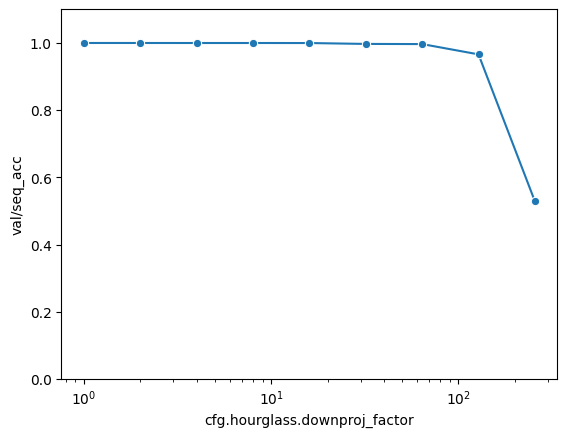

In [9]:
sns.lineplot(data=cath_shortened, x="cfg.hourglass.downproj_factor", y="val/seq_acc", marker="o")
plt.ylim(0,1.1)
plt.xscale("log")
plt.show()

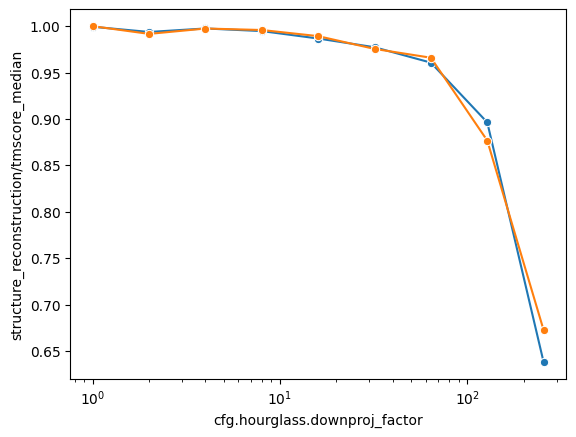

In [7]:
sns.lineplot(data=cath_shortened, x="cfg.hourglass.downproj_factor", y='structure_reconstruction/tmscore_median', marker="o")
sns.lineplot(data=cath_shortened, x="cfg.hourglass.downproj_factor", y='structure_reconstruction/lddt_median', marker="o")
plt.xscale("log")

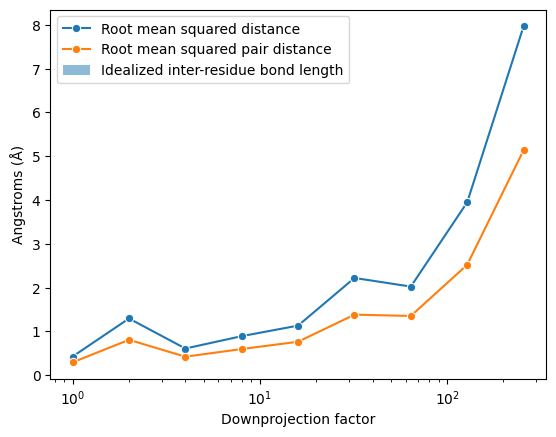

In [13]:
sns.lineplot(data=cath_shortened, x="cfg.hourglass.downproj_factor", y='structure_reconstruction/rmsd_mean', marker="o", label="Root mean squared distance")
sns.lineplot(data=cath_shortened, x="cfg.hourglass.downproj_factor", y='structure_reconstruction/rmspd_mean', marker="o", label="Root mean squared pair distance")

between_res_bond_length_c_n = [1.329, 1.341]

# Plot the shaded region
# ax.fill_between(x, between_res_bond_length_c_nbetween_res_bond_length_c_n, color='gray', alpha=0.3)
plt.axhspan(between_res_bond_length_c_n[0], between_res_bond_length_c_n[1], alpha=0.5, label="Idealized inter-residue bond length")


plt.legend()
plt.ylabel("Angstroms (Å)")
plt.xlabel("Downprojection factor")
plt.xscale("log")

In [18]:
df = pd.read_csv("plaid_csvs/plaid_hourglass_vq.csv", sep=",")
print(df.shape)
df.head()

(146, 171)


,Name,State,cfg.hourglass.downproj_factor,Runtime,cfg.datamodule.fasta_file,cfg.hourglass.fsq_levels,cfg.datamodule.shard_dir,cfg.hourglass.e_dim,cfg.hourglass.n_e,cfg.hourglass.use_quantizer,...,shorten_factor,val/recons_loss,lr,fsq_levels,cfg.model_id,ID,cfg.downproj_factor,rmsd_mean,tmscore_mean,cfg.callbacks.checkpoint.dirpath
0,no-quant,finished,256,46844,NaN,NaN,/homefs/home/lux70/storage/data/cath/shards,64,512,false,...,2,0.023893,0.00003,NaN,NaN,kuugebm4,NaN,NaN,NaN,/homefs/home/lux70/storage/plaid/checkpoints/h...
1,tanh,crashed,256,46982,NaN,NaN,/homefs/home/lux70/storage/data/uniref50/subse...,64,128,tanh,...,1,0.019498,0.00003,NaN,2024-03-30T00-32-11,i5ziudbu,NaN,NaN,NaN,/homefs/home/lux70/storage/plaid/checkpoints/h...
2,tanh,finished,256,192833,NaN,NaN,/homefs/home/lux70/storage/data/uniref50/subse...,64,128,tanh,...,2,0.021306,0.00005,NaN,2024-03-30T18-24-25,wiagci9m,NaN,NaN,NaN,/homefs/home/lux70/storage/plaid/checkpoints/h...
3,fsq,finished,256,8446,NaN,"[5,5,5,5]",/homefs/home/lux70/storage/data/uniref50/subse...,64,128,fsq,...,1,0.028598,0.00003,"[5,5,5,5]",NaN,a8q3syhx,NaN,NaN,NaN,/homefs/home/lux70/storage/plaid/checkpoints/h...
4,fsq,finished,256,66161,NaN,"[8,8,8,8]",/homefs/home/lux70/storage/data/uniref50/subse...,64,128,fsq,...,1,0.032399,0.00010,"[8,8,8,8]",2024-03-23T07-05-16,4ne07pwm,NaN,NaN,NaN,/homefs/home/lux70/storage/plaid/checkpoints/h...


In [5]:
df.use_quantizer.unique()

array(['false', 'tanh', 'fsq', 'fsq_bound_only', 'true', nan],
      dtype=object)

In [21]:
vqvae_df = df[(df.use_quantizer.isna() | (df.use_quantizer == "true"))]

In [23]:
print(vqvae_df.shape)
vqvae_df.head()

(75, 171)


,Name,State,cfg.hourglass.downproj_factor,Runtime,cfg.datamodule.fasta_file,cfg.hourglass.fsq_levels,cfg.datamodule.shard_dir,cfg.hourglass.e_dim,cfg.hourglass.n_e,cfg.hourglass.use_quantizer,...,shorten_factor,val/recons_loss,lr,fsq_levels,cfg.model_id,ID,cfg.downproj_factor,rmsd_mean,tmscore_mean,cfg.callbacks.checkpoint.dirpath
52,uniref-subset-ne131072-edim64-seqlen512,finished,16,166651,NaN,NaN,/homefs/home/lux70/storage/data/uniref50/subse...,64,131072,true,...,1,0.022911,0.00003,NaN,NaN,pwdpox5z,16.0,NaN,NaN,/homefs/home/lux70/storage/plaid/checkpoints/h...
54,downproj16_64,finished,16,67649,NaN,NaN,/homefs/home/lux70/storage/data/cath/shards,64,512,true,...,1,0.024498,0.00005,NaN,NaN,p4ykerwn,NaN,NaN,NaN,/homefs/home/lux70/storage/plaid/checkpoints/h...
57,pear-pastry-147,crashed,16,64425,NaN,NaN,/homefs/home/lux70/storage/data/cath/shards,64,131072,true,...,1,0.019535,0.00010,NaN,NaN,gkqwfhp5,NaN,NaN,NaN,/homefs/home/lux70/storage/plaid/checkpoints/h...
58,uniref-seqlen256-ne65536-dproj16-depth8,finished,16,108047,/homefs/home/lux70/storage/data/uniref50/unire...,NaN,NaN,64,65536,true,...,1,NaN,0.00008,NaN,NaN,vv92jfir,16.0,NaN,NaN,/homefs/home/lux70/storage/plaid/checkpoints/h...
59,uniref-subset-ne131072-edim64-seqlen512,finished,16,166587,NaN,NaN,/homefs/home/lux70/storage/data/uniref50/subse...,64,131072,true,...,1,0.025296,0.00001,NaN,NaN,4onxrwag,16.0,NaN,NaN,/homefs/home/lux70/storage/plaid/checkpoints/h...
